Import packacges.

In [1]:
# %matplotlib notebook

%reload_ext autoreload
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, PolynomialFeatures, scale

%aimport Sherlock
from Sherlock import Sherlock
from RBF import bases
from utils import adrs, read_design_space, approximate_pareto
import dcor

try: import GPy
except: pass

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.ERROR, datefmt='%I:%M:%S')

%autoreload 1

Read the design space.

In [2]:
X, y, _, names, _ = read_design_space('../../final_result_impl_normals.csv',
                                      use_hint=False, random_factor=0.0, hint_random_factor=0.0,
                                      return_names=True)

Plot the design space.

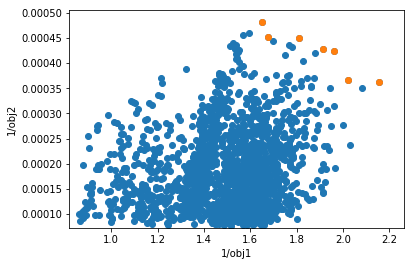

In [3]:
plt.figure()
y_pareto = approximate_pareto(y)[0]
plt.scatter(y[:,0], y[:,1])
plt.scatter(y_pareto[:,0], y_pareto[:,1])
plt.xlabel("1/" + names[-2])
plt.ylabel("1/" + names[-1])
plt.xlim(left=y[:,0].min()*0.95, right=y[:,0].max()*1.05)
plt.ylim(bottom=y[:,1].min()*0.95, top=y[:,1].max()*1.05)
plt.show()

Run Sherlock.

0.0


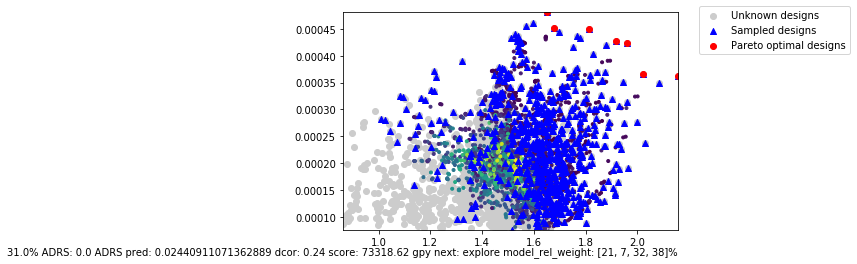

In [4]:
sherlock = Sherlock(
    n_init=5,
    budget=int(X.shape[0]*0.31),
    surrogate_type="rbfthin_plate-rbf_multiquadric-randomforest-gpy", #rbfthin_plate-rbf_multiquadric-randomforest-gpy
    kernel="matern",
    num_restarts=0,
    pareto_margin=0,
    y_hint=None,
    output_stats="", #"adrs,dcor,dcor_energy,entropy,pareto_score,next_action",
    plot_design_space=True,
    use_ted_in_loop=False,
    request_output=lambda y, idx: None,
    action_only=None,
    n_hint_init=0,
    scale_output=True,
    use_trace_as_prior=True,
    model_selection_type="mab10")

sherlock.fit(X).predict(X,y)
err = adrs(y, sherlock.known_idx, approximate=True)
print(err)

In [5]:
sherlock.known_idx

array([1169,  653,  650,  647, 1565,  266,   96, 1968,    0,    7,    1,
         34,    2,   97, 1838,    3,  101,    8,  129,  454,  130, 1831,
          4,  131,  423,  132,  149,  136,  424,  425, 2011,  133,  923,
        930,  103,  924,  889,  925, 1847,  426, 1719,  137,  525,  191,
       2084,  192,  535,  193,  467, 1972,  932, 1973, 1055, 1056,  389,
         98,    5,  390, 1865,  392,  430, 1974,  926,  536, 1866, 1940,
       2012,  391, 1766, 1833,  194, 1376, 1469,  252,  538,  892,  431,
        890, 1381,  100,  253,  254,  134,  537, 1348, 2042,  198,  259,
        316, 1832,  542,   99, 1818,  199,    6,  221, 1023,  635, 1057,
       1868, 1988, 2054, 1010, 1982, 1961, 1960, 1854,  484, 2002, 2024,
       2001, 1993,  483, 1743,  482,  954,  437, 1979,  481,  980,  485,
       1004,  987, 1349, 1058,  981,  582,  488,  489,  589,  988,  583,
        982,  594,  490,  584,  138, 1105, 1106, 1752, 1880,  486,  487,
       1754, 1112, 2004,  491,  492, 1962,  493,  6